This demo is to use the pen-digit data as an example to illustrate the properties of the signature and the log-signature feature set, and articulate the pros and cons of those two feature set by comparison.

The UCI pendigit data used in the demo is a pen handwritten digit database of 250 samples from 44 writers. It can be downloaded via [UCI database link](https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/).

# Problem setup and import data

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
cd /gdrive/My Drive/Colab Notebooks/sequential mnist

/gdrive/My Drive/Colab Notebooks/sequential mnist


In [6]:
!pip install esig

In [0]:
# import the required python packages
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import ParameterGrid
from sklearn import preprocessing
import random
import esig
import pandas as pd
import seaborn as sns
from GetSeqMnistData import *

In [0]:
# import train/test data
train_X, train_Y = GetSeqPenDigit('pendigits-orig.tra.txt')
test_X, test_Y = GetSeqPenDigit('pendigits-orig.tes.txt')


In [0]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

# Reshape the 1 dim vector to 2 dimensional path, and normalize the path using min-max scaler.
def data2Path(data):
  l = int(np.shape(data)[0]/2)
  path = np.zeros((l,2), float)
  data_array= np.array(data)
  path[:,0] = data_array[::2]
  path[:,1] = data_array[1::2]
  X_train_minmax = mm_scaler.fit_transform(path)
  return path

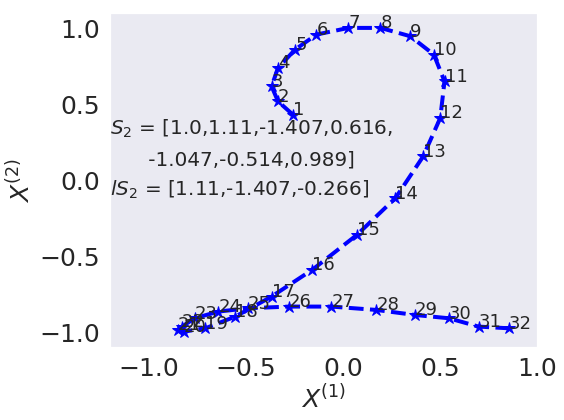

In [10]:
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.labelsize'] = 20

# plot a pen-digit sample
def PlotClip(data):
  sns.set()
  l = int(np.shape(data)[0]/2)
  path = np.zeros((l,2), float)
  data_array= np.array(data)
  path[:,0] = data_array[::2]
  path[:,1] = data_array[1::2]
  plt.figure(figsize=(8,6))
  plt.tick_params(labelsize=25)
  plt.xlim((-1.2, 1)) 
  plt.plot(path[:,0], path[:,1], '--*', markersize=12,linewidth=4, color = 'blue')
  plt.xlabel('$X^{(1)}$', fontsize = 25, fontweight = 'heavy')
  plt.ylabel('$X^{(2)}$', fontsize = 25, fontweight = 'bold')
  ts1 = np.around(ts.stream2sig(path, 2), 3)
  ls1= np.around(ts.stream2logsig(path, 2), 3)
  
  for i in range(l):
        plt.annotate(str(i+1), (path[i, 0],path[i, 1]), fontsize=18)
      
  s1 = ','.join(map(str, ts1[:4])) 
  s2 = ','.join(map(str, ts1[4:]))  
  sls1 = ','.join(map(str, ls1))
  plt.text(-1.2, 0.3, '$S_2$ = ['+ s1+',', fontsize=20)
  plt.text(-1.2,0.1, '      '+ s2+']', fontsize=20)
  plt.text(-1.2,- 0.1, '$lS_2$ = [' + sls1+']', fontsize=20)
  
  plt.grid(False)
  plt.tight_layout()
 
  plt.show() 
  
random.seed(49)
i = random.randint(1,750) # select one sample
i = 47
PlotClip(train_X[i]) # visualize the pen trajactory of the i^th sample


# Signature and Log-signature Calculation


## Calculating the signature of a path

In [11]:
# Calculating the signature of a path
deg_sig = 3
d = 2 # d - path dim
path = data2Path(train_X[i])
sig = ts.stream2sig(path, deg_sig)
print(' The signature feature = {}'.format(sig))
print('The signature basis = {}'.format(ts.sigkeys(d,deg_sig)))
print('The signature dimension of a {} dim path up to degree {} = {}'.format(d, deg_sig, ts.sigdim(2, deg_sig)))

 The signature feature = [ 1.          1.10989011 -1.40659341  0.61592803 -1.04667311 -0.514491
  0.98925251  0.22787081 -0.32691921 -0.50785372  1.22825011 -0.03158738
 -0.98425674  0.85396819 -0.46382535]
The signature basis =  () (1) (2) (1,1) (1,2) (2,1) (2,2) (1,1,1) (1,1,2) (1,2,1) (1,2,2) (2,1,1) (2,1,2) (2,2,1) (2,2,2)
The signature dimension of a 2 dim path up to degree 3 = 15



## Calculating the log-signature of a path



In [12]:
deg_logsig = 3

logsig = ts.stream2sig(path, deg_sig)
logsigKeys = ts.logsigkeys(2,deg_logsig)
print(' The log-signature feature = {}'.format(logsig))
print('The log-signature basis = {}'.format(logsigKeys ))
print('The log-signature dimension of a {} dim path up to degree {} = {}'.format(d, deg_logsig, ts.logsigdim(2, deg_logsig)))


 The log-signature feature = [ 1.          1.10989011 -1.40659341  0.61592803 -1.04667311 -0.514491
  0.98925251  0.22787081 -0.32691921 -0.50785372  1.22825011 -0.03158738
 -0.98425674  0.85396819 -0.46382535]
The log-signature basis =  1 2 [1,2] [1,[1,2]] [2,[1,2]]
The log-signature dimension of a 2 dim path up to degree 3 = 5


# Properties of (Log-)Signature Features

## Invariance under time parameterization

Here we re-parameterize the 2-dimensional pen trajactory by two different time parameterization, which results in different time series representations. However, the signature/log-signature remain the same under time parameterization. 

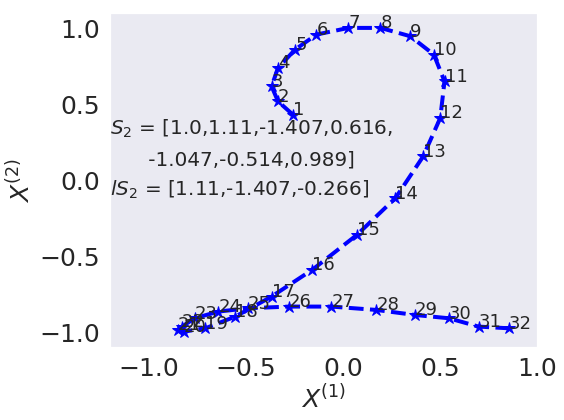

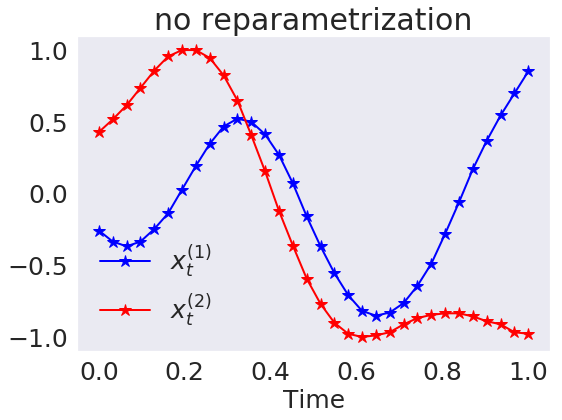

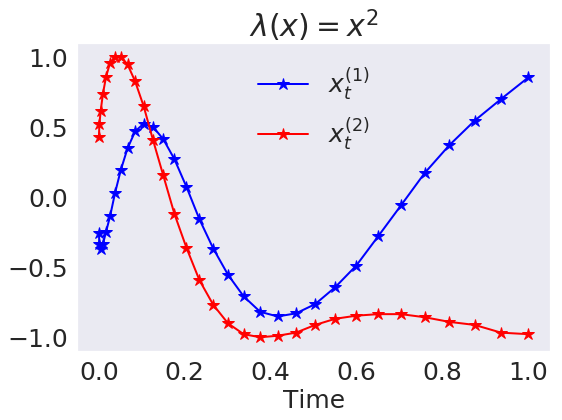

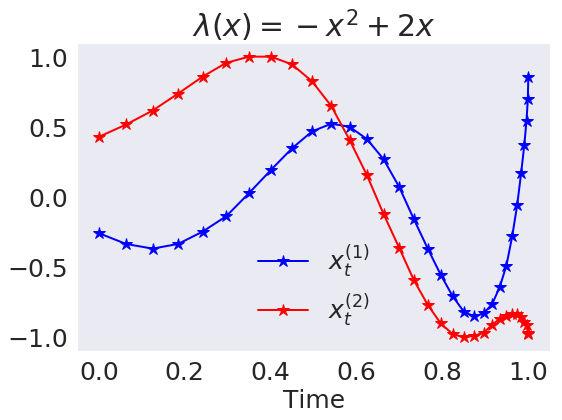

In [13]:
t = np.linspace(0,1,np.shape(path)[0])
noTimeParam = lambda t:t
TimeParam1= lambda t: t ** 2  
TimeParam2= lambda t: -t ** 2  +2*t


def PlotTimeParamPath(path, t, TimeParamFunc, title, filename = 'noParam.png'):
  TimeParam1v = np.vectorize(TimeParamFunc)
  t1 = TimeParam1v(t)
  sns.set()
  fig = plt.figure(figsize=(8,6))

  plt.tick_params(labelsize=25)
  plt.xlabel('Time', fontsize=25)
  plt.plot(t1,path[:, 0],'*-',label='$x_t^{(1)}$', linewidth=2, markersize=12, color = 'blue')
  plt.plot(t1,path[:, 1],'*-',label='$x_t^{(2)}$', linewidth=2, markersize=12, color = 'red')
  plt.title(title, fontsize=30)
  plt.legend(fontsize=25, frameon=False)
  plt.grid(False)
  plt.tight_layout()
  plt.axis('on')
  plt.savefig(filename, transparent = True)
  plt.show()  


PlotClip(train_X[i])
PlotTimeParamPath(path, t, noTimeParam, 'no reparametrization')
PlotTimeParamPath(path, t, TimeParam1, '$\lambda(x) = x^2$', 'Param1.png')
PlotTimeParamPath(path, t, TimeParam2, '$\lambda(x) = - x^2 + 2x$', 'Param2.png')


## Time series of Variable Length

In [14]:
path1 = data2Path(train_X[0])
l1 = np.shape(path1)[0]
print('the lengh of path 1 is {}'.format(l1) )
path2 = data2Path(train_X[1])
l2 = np.shape(path2)[0]
print('the lengh of path 2 is {}'.format(np.shape(path2)[0]) )

deg_sig = 4
sig1 = ts.stream2sig(path1, deg_sig)
sig2 = ts.stream2sig(path2, deg_sig)
logsig1 = ts.stream2logsig(path1, deg_sig)
logsig2 = ts.stream2logsig(path2, deg_sig)

d_sig1 = np.shape(sig1)[0]
d_sig2 = np.shape(sig2)[0]
d_logsig1 = np.shape(logsig1)[0]
d_logsig2 = np.shape(logsig2)[0]
print('the dim of sig1 = {}'.format(d_sig1))
#print('the signature of path 1 is {}'.format(sig1))
#print('the signature of path 2 is {}'.format(sig2))
print('the dim of sig2 = {}'.format(d_sig2))

print('the length of path 1 and path 2 are equal? {}'.format(l1==l2))

print('the dim of sig1 and sig2 are equal? {}'.format(d_sig1==d_sig2))

print('the dim of logsig1 and logsig2 are equal? {}'.format(d_logsig1==d_logsig2))

the lengh of path 1 is 78
the lengh of path 2 is 39
the dim of sig1 = 31
the dim of sig2 = 31
the length of path 1 and path 2 are equal? False
the dim of sig1 and sig2 are equal? True
the dim of logsig1 and logsig2 are equal? True


## Missing Data

53
53


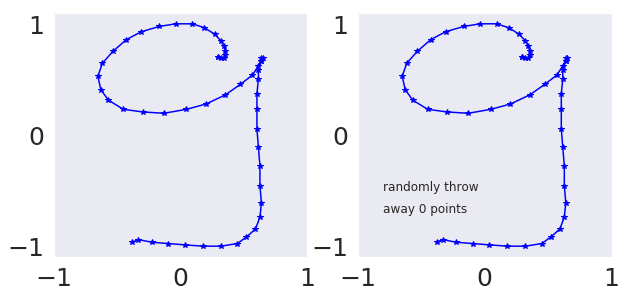

In [15]:
path1 = data2Path(train_X[10])
l1 = np.shape(path1)[0]
print(l1)
def drop_points_path(path, max_points):
  point_number = np.random.randint(max_points, size = 1)
  drop_index_vec = np.random.randint(l1,size = point_number)
  mask = np.ones(l1,dtype=bool)
  mask[drop_index_vec] = False
  droped_path = path[mask, :]
  return droped_path

droped_path = drop_points_path(path1, max_points = 16)

print(np.shape(droped_path)[0])
plt.subplots(1, 2, figsize = (10, 4.5))
plt.subplot(121)
plt.tick_params(labelsize=25)
plt.plot(path1[:, 0], path1[:, 1], '-*', color = 'blue') 
plt.xlim(-1,1)
plt.grid(False)
plt.subplot(122)
plt.tick_params(labelsize=25)
plt.plot(droped_path[:, 0], droped_path[:, 1], '-*', color = 'blue') 
plt.text(-0.8,-0.5, 'randomly throw')
plt.text(-0.8, -0.7, 'away '+str(l1-np.shape(droped_path)[0])+' points')
plt.xlim(-1,1)
plt.grid(False)
plt.show()


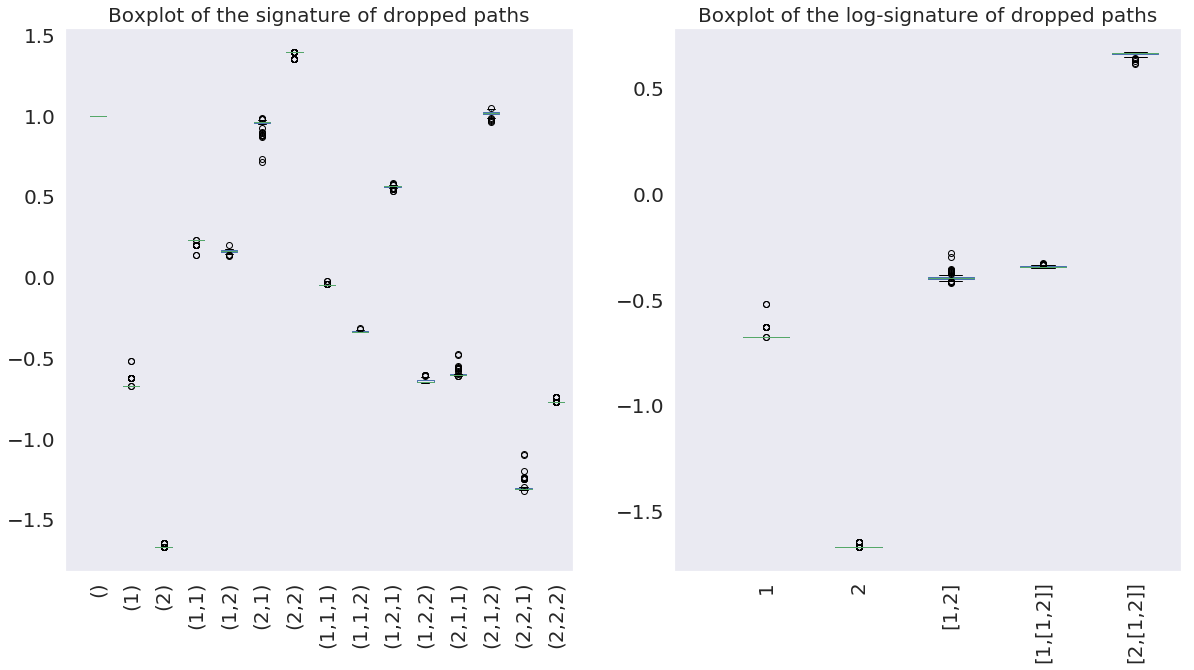

In [16]:
## We randomly sample 100 paths by dropping at most 16 points from path1.
deg_sig = 3
deg_logsig = 3
sigs_path1 = ts.stream2sig(path1, deg_sig)
logsigs_path1 = ts.stream2logsig(path1, deg_logsig)
sigs_droped_path = []
logsigs_droped_path = []

for i in range(100):
  droped_path = drop_points_path(path1, max_points = 16)
  sigs_droped_path.append(ts.stream2sig(droped_path, deg_sig))
  logsigs_droped_path.append(ts.stream2logsig(droped_path, deg_logsig))

## We visualize the boxplots of the (log)-signature of the modified paths by dropping points randomly 
sigKeys = ts.sigkeys(2,deg_sig).split(" ")
df_sigs_droped_path=pd.DataFrame(np.asarray(sigs_droped_path), columns = sigKeys[1:])

logsigKeys = ts.logsigkeys(2,deg_sig).split(" ")
df_logsigs_droped_path=pd.DataFrame(np.asarray(logsigs_droped_path), columns = logsigKeys[1:])

sns.set()
plt.subplots(1, 2, figsize = (20, 10))
plt.subplot(1,2,1)
df_sigs_droped_path.boxplot( )
plt.title('Boxplot of the signature of dropped paths', fontsize=20)
plt.xticks(np.arange(np.shape(sigKeys)[0]), sigKeys, rotation='vertical', fontsize = 20)
plt.yticks(fontsize=20)
plt.grid(False)
plt.subplot(1,2,2)
df_logsigs_droped_path.boxplot( )
plt.title('Boxplot of the log-signature of dropped paths', fontsize=20)
plt.xticks(np.arange(np.shape(logsigKeys)[0]), logsigKeys, rotation='vertical', fontsize = 20)
plt.yticks(fontsize=20)
#plt.ylim(-1.5, 2.5)
plt.grid(False)
plt.show()

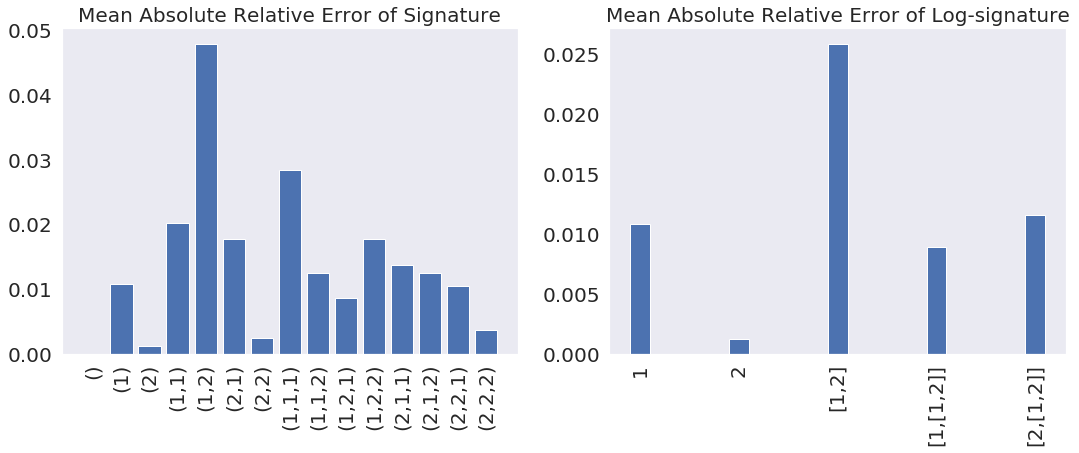

In [17]:
from sklearn.metrics import mean_absolute_error

sig_error_list = []
j = 0
for item in sigKeys[1:]:  
  error = np.mean(np.abs(df_sigs_droped_path[item]-sigs_path1[j]))/np.abs(sigs_path1[j])
  #print(error)
  sig_error_list.append(error)
  j = j+1
  
logsig_error_list = []
j = 0
for item in logsigKeys[1:]:  
  error = np.mean(np.abs(df_logsigs_droped_path[item]-logsigs_path1[j]))/np.abs(logsigs_path1[j])
  #print(error)
  logsig_error_list.append(error)
  j = j+1
    
plt.subplots(1, 2, figsize = (18, 6))
plt.subplot(1,2,1)
plt.bar(sigKeys[1:],np.asarray(sig_error_list),width = 0.8 )
plt.xticks(np.arange(np.shape(sigKeys[1:])[0]), sigKeys[1:], rotation='vertical', fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Mean Absolute Relative Error of Signature', fontsize = 20)
plt.grid(False)
plt.subplot(1,2,2) 
plt.bar(logsigKeys[1:], np.asarray(logsig_error_list), width = 0.2)  
plt.title('Mean Absolute Relative Error of Log-signature', fontsize = 20)
plt.xticks(np.arange(np.shape(logsigKeys[1:])[0]), logsigKeys[1:], rotation='vertical', fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(False)
plt.show()

#Comparison of the signature and log signature

## Distribution of the (log)-signature

In [18]:
# Compute the signature feature and the log signature feature of all the samples in the training set
sigs_train_X = np.array([ts.stream2sig(data2Path(item), deg_sig) for item in train_X]) 
logsigs_train_X = np.array([ts.stream2logsig(data2Path(item), deg_logsig) for item in train_X]) 

train_y_int = [np.where(r==1)[0][0] for r in train_Y] # convert one hot label to integer label
df_sigs = pd.DataFrame(sigs_train_X, columns= sigKeys[1:])
df_logsigs = pd.DataFrame(logsigs_train_X, columns= logsigKeys[1:])
print(np.shape(sigs_train_X ))
print(len(df_sigs))

(7494, 15)
7494


In [0]:
df_logsigs['Digit Label'] = train_y_int
df_sigs['Digit Label'] = train_y_int


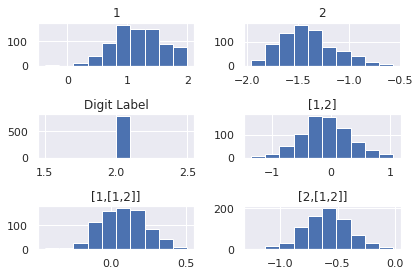

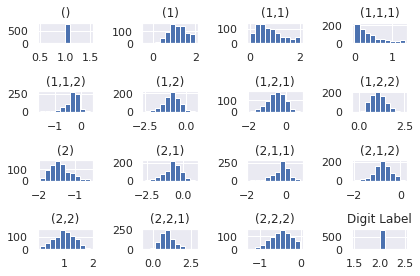

In [20]:
df_sigs_2 = df_sigs[df_sigs['Digit Label'] ==2]
df_logsigs_2 = df_logsigs[df_logsigs['Digit Label'] ==2]
df_logsigs_2.hist()
plt.tight_layout()
plt.show()
df_sigs_2.hist()
plt.tight_layout()
plt.show()

## Comparison of digit 6 and digit 8 

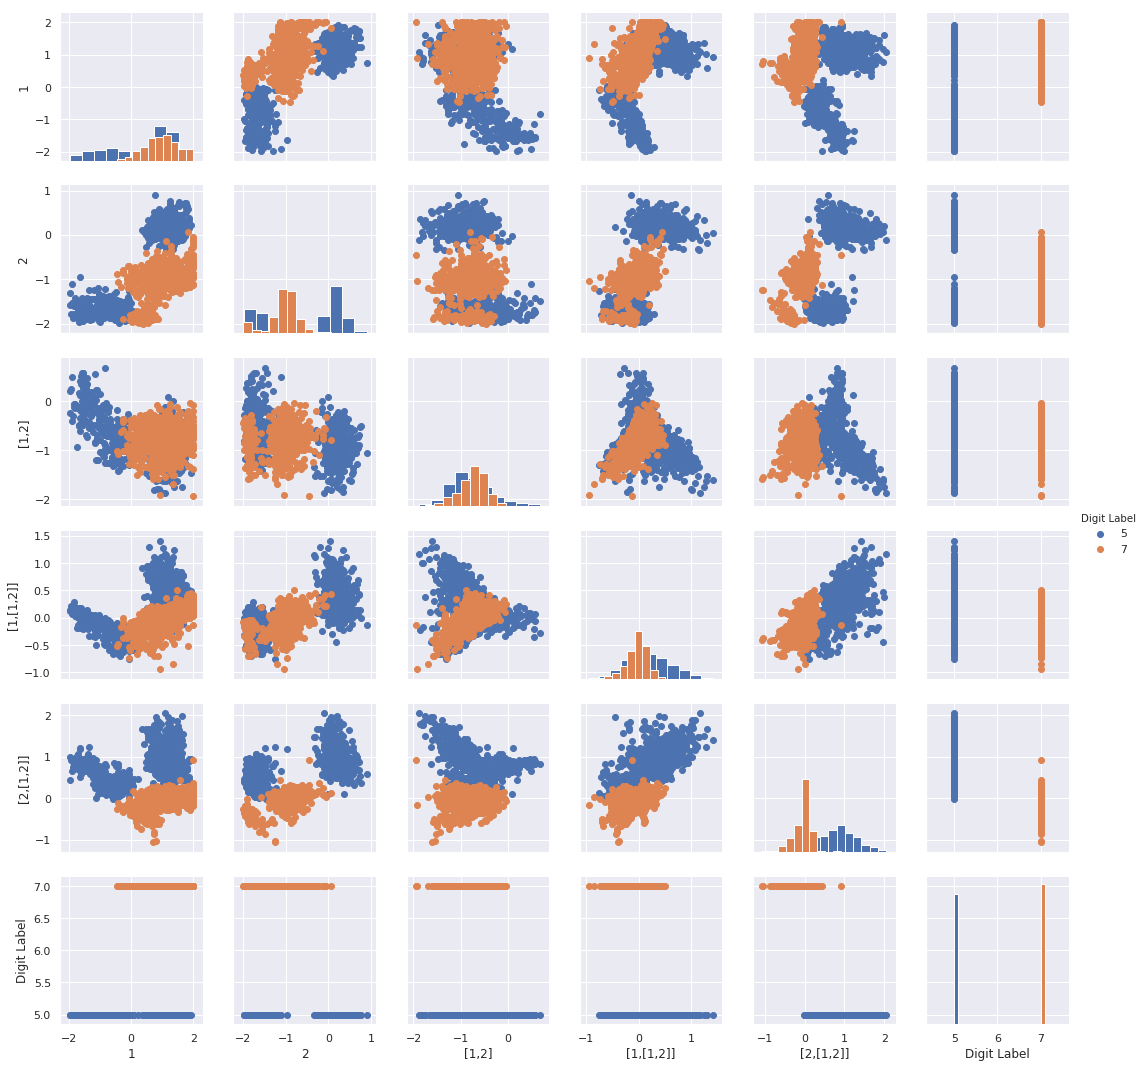

In [21]:
df_logsigs6_8 = df_logsigs[(df_logsigs['Digit Label']==5) | (df_logsigs['Digit Label']==7)]

g = sns.PairGrid(df_logsigs6_8, hue="Digit Label")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
plt.show()

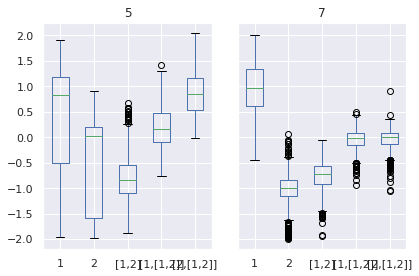

In [22]:
sns.set()
df_logsigs6_8.groupby('Digit Label').boxplot(column=logsigKeys[1:])

plt.tight_layout()
plt.show()

In [23]:
df_sigs['Digit Label'] = train_y_int
g = sns.PairGrid(df_sigs, hue="Digit Label")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

Output hidden; open in https://colab.research.google.com to view.